In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('train_data.csv')

In [4]:
df.head()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
0,144703125000,17539344,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-5.0,2016-11-15 19:16:12+00:00,2,0
1,77406814453032,24710841,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,100.0,2017-01-11 09:25:33+00:00,2,0
2,308929485482801,24265476,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,50.0,2016-12-07 07:58:09+00:00,2,0
3,665270027747073,10240000,other_debit_cards,102557,cat_3,IND_INR,other_pcs,1000.0,2017-01-11 16:15:44+00:00,2,0
4,38276160171101,5880625,other_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2016-11-16 17:04:42+00:00,2,0


In [5]:
df.shape

(76529, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76529 entries, 0 to 76528
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_number        76529 non-null  int64  
 1   user_id                   76529 non-null  int64  
 2   payment_method            76529 non-null  object 
 3   partner_id                76529 non-null  int64  
 4   partner_category          76529 non-null  object 
 5   country                   76529 non-null  object 
 6   device_type               76529 non-null  object 
 7   money_transacted          76529 non-null  float64
 8   transaction_initiation    76529 non-null  object 
 9   partner_pricing_category  76529 non-null  int64  
 10  is_fraud                  76529 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 6.4+ MB


In [7]:
df.nunique()    
# Transaction_id is unique, transaction initiated time is almost distinct unique, country column is same for all the tuples,
# so we can remove it

transaction_number          76529
user_id                      3594
payment_method                  6
partner_id                     23
partner_category                9
country                         1
device_type                     4
money_transacted             1454
transaction_initiation      75811
partner_pricing_category        4
is_fraud                        2
dtype: int64

In [8]:
df['is_fraud'].value_counts()  # Target variable is highly imbalance

0    76375
1      154
Name: is_fraud, dtype: int64

In [9]:
df.drop(['transaction_number', 'country'], axis = 1, inplace = True)

In [10]:
df.head()

,user_id,payment_method,partner_id,partner_category,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
0,17539344,sbi_atm_cum_debit_card,47334,cat_1,android_devices,-5.0,2016-11-15 19:16:12+00:00,2,0
1,24710841,e_wallet_payments,78890,cat_2,other_pcs,100.0,2017-01-11 09:25:33+00:00,2,0
2,24265476,e_wallet_payments,78890,cat_2,other_pcs,50.0,2016-12-07 07:58:09+00:00,2,0
3,10240000,other_debit_cards,102557,cat_3,other_pcs,1000.0,2017-01-11 16:15:44+00:00,2,0
4,5880625,other_debit_cards,118335,cat_1,other_pcs,200.0,2016-11-16 17:04:42+00:00,2,0


In [11]:
df.isna().sum()  # There are no null values

user_id                     0
payment_method              0
partner_id                  0
partner_category            0
device_type                 0
money_transacted            0
transaction_initiation      0
partner_pricing_category    0
is_fraud                    0
dtype: int64

In [12]:
df.describe(include = 'all')

,user_id,payment_method,partner_id,partner_category,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
count,7.652900e+04,76529,76529.000000,76529,76529,76529.000000,76529,76529.000000,76529.000000
unique,NaN,6,NaN,9,4,NaN,75811,NaN,NaN
top,NaN,sbi_atm_cum_debit_card,NaN,cat_1,other_pcs,NaN,2016-12-24 16:30:13+00:00,NaN,NaN
freq,NaN,30538,NaN,36306,45560,NaN,12,NaN,NaN
mean,1.247483e+07,NaN,58497.189105,NaN,NaN,132.724348,NaN,2.255707,0.002012
std,1.205878e+07,NaN,36740.216787,NaN,NaN,2350.110900,NaN,0.732174,0.044814
min,1.000000e+00,NaN,7889.000000,NaN,NaN,-20000.000000,NaN,0.000000,0.000000
25%,3.515625e+06,NaN,23667.000000,NaN,NaN,-1.000000,NaN,2.000000,0.000000
50%,9.753129e+06,NaN,47334.000000,NaN,NaN,20.000000,NaN,2.000000,0.000000
75%,1.788444e+07,NaN,78890.000000,NaN,NaN,52.000000,NaN,2.000000,0.000000


In [13]:
df.columns

Index(['user_id', 'payment_method', 'partner_id', 'partner_category',
       'device_type', 'money_transacted', 'transaction_initiation',
       'partner_pricing_category', 'is_fraud'],
      dtype='object')

In [14]:
for i in ['payment_method', 'partner_id', 'partner_category',
       'device_type', 'partner_pricing_category', 'is_fraud']:
    x = df[i].nunique()
    y = list(df[i].unique())
    z = df[i].value_counts()
    print('**************************************')
    print('\n')
    print(f'Featue {i} has {x} unique variables \n\n The list of unique variables is {y} \n\n and their count is \n\n {z} ')

**************************************


Featue payment_method has 6 unique variables 

 The list of unique variables is ['sbi_atm_cum_debit_card', 'e_wallet_payments', 'other_debit_cards', 'visa_master_debit_cards', 'visa_master_credit_cards', 'unified_payments_interface'] 

 and their count is 

 sbi_atm_cum_debit_card        30538
e_wallet_payments             27384
visa_master_debit_cards       11643
other_debit_cards              4495
visa_master_credit_cards       2454
unified_payments_interface       15
Name: payment_method, dtype: int64 
**************************************


Featue partner_id has 23 unique variables 

 The list of unique variables is [47334, 78890, 102557, 118335, 23667, 7889, 31556, 86779, 149891, 165669, 110446, 189336, 55223, 63112, 15778, 157780, 213003, 173558, 39445, 126224, 71001, 94668, 181447] 

 and their count is 

 47334     26105
23667     19526
78890     12273
118335     9546
7889       2317
31556      1892
165669     1216
86779      1121
14989

In [15]:
cat_cols = ['user_id','payment_method','partner_id','partner_category', 'device_type', 'partner_pricing_category', 'is_fraud']
df[cat_cols] = df[cat_cols].astype('category')

In [16]:
df['transaction_initiation'] = pd.to_datetime(df['transaction_initiation'])

In [17]:
df['transaction_year'] = df['transaction_initiation'].dt.year
df['transaction_date'] = df['transaction_initiation'].dt.day
df['transaction_month']=df['transaction_initiation'].dt.month
df['transaction_hour'] = df['transaction_initiation'].dt.hour
df['transaction_weekday']=df['transaction_initiation'].dt.weekday


In [18]:
df.dtypes

user_id                                category
payment_method                         category
partner_id                             category
partner_category                       category
device_type                            category
money_transacted                        float64
transaction_initiation      datetime64[ns, UTC]
partner_pricing_category               category
is_fraud                               category
transaction_year                          int64
transaction_date                          int64
transaction_month                         int64
transaction_hour                          int64
transaction_weekday                       int64
dtype: object

In [19]:
df.head()

,user_id,payment_method,partner_id,partner_category,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud,transaction_year,transaction_date,transaction_month,transaction_hour,transaction_weekday
0,17539344,sbi_atm_cum_debit_card,47334,cat_1,android_devices,-5.0,2016-11-15 19:16:12+00:00,2,0,2016,15,11,19,1
1,24710841,e_wallet_payments,78890,cat_2,other_pcs,100.0,2017-01-11 09:25:33+00:00,2,0,2017,11,1,9,2
2,24265476,e_wallet_payments,78890,cat_2,other_pcs,50.0,2016-12-07 07:58:09+00:00,2,0,2016,7,12,7,2
3,10240000,other_debit_cards,102557,cat_3,other_pcs,1000.0,2017-01-11 16:15:44+00:00,2,0,2017,11,1,16,2
4,5880625,other_debit_cards,118335,cat_1,other_pcs,200.0,2016-11-16 17:04:42+00:00,2,0,2016,16,11,17,2


In [20]:
df.drop('transaction_initiation', axis = 1, inplace = True)

In [21]:
df.describe(include = 'all')

,user_id,payment_method,partner_id,partner_category,device_type,money_transacted,partner_pricing_category,is_fraud,transaction_year,transaction_date,transaction_month,transaction_hour,transaction_weekday
count,76529.0,76529,76529.0,76529,76529,76529.000000,76529.0,76529.0,76529.000000,76529.000000,76529.000000,76529.000000,76529.000000
unique,3594.0,6,23.0,9,4,NaN,4.0,2.0,NaN,NaN,NaN,NaN,NaN
top,53919649.0,sbi_atm_cum_debit_card,47334.0,cat_1,other_pcs,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN
freq,3240.0,30538,26105.0,36306,45560,NaN,63899.0,76375.0,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,132.724348,NaN,NaN,2016.496100,15.909551,6.576958,12.452260,2.976911
std,NaN,NaN,NaN,NaN,NaN,2350.110900,NaN,NaN,0.499988,8.956141,5.223658,4.850698,1.929435
min,NaN,NaN,NaN,NaN,NaN,-20000.000000,NaN,NaN,2016.000000,1.000000,1.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,2016.000000,8.000000,1.000000,8.000000,2.000000
50%,NaN,NaN,NaN,NaN,NaN,20.000000,NaN,NaN,2016.000000,16.000000,11.000000,13.000000,2.000000
75%,NaN,NaN,NaN,NaN,NaN,52.000000,NaN,NaN,2017.000000,24.000000,12.000000,17.000000,5.000000


# EDA

## Univariate Analysis

In [22]:
def barplot(column,df):
    plt.figure(figsize = (15,6))
    bar_plot1 = sns.countplot(x=column, data=df)
    plt.xticks(rotation = 45)
    total = len(df[column])
    for p in bar_plot1.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        height = p.get_height()
        bar_plot1.text(p.get_x()+ p.get_width()/2, height + 400, percentage, ha="center")

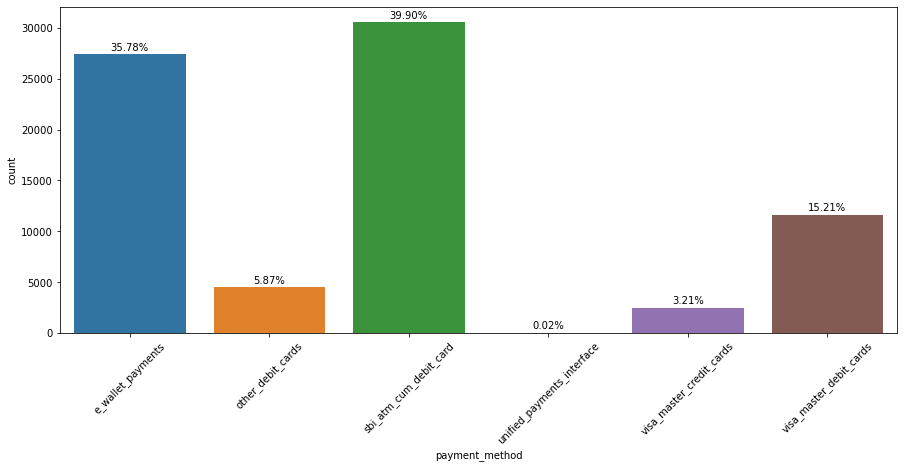

In [23]:
barplot('payment_method',df)  # Upi payment methods are very few

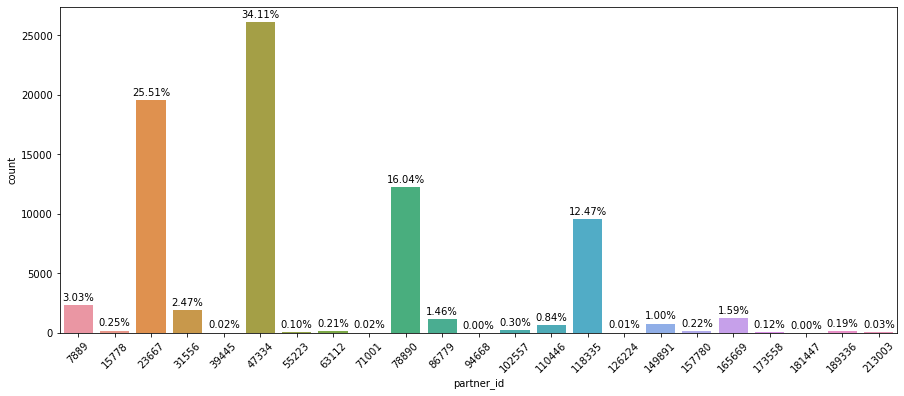

In [24]:
barplot('partner_id',df)  # Around 88 percent of the transactions are done by ony 4 partners

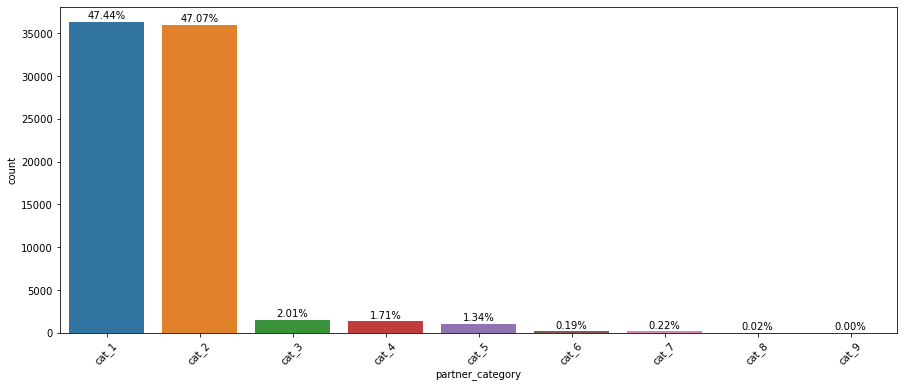

In [25]:
barplot('partner_category',df)  # Around 95% of the traansactions belong to category 1,2

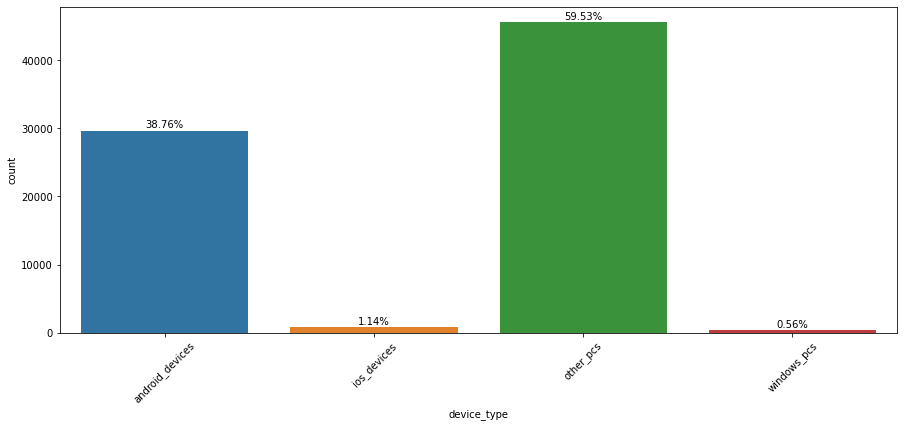

In [26]:
barplot('device_type',df) # Very few transactions are done through IOS devices and Windows_ps

In [27]:
print(df['money_transacted'].max())
print(df['money_transacted'].min())

197217.76
-20000.0


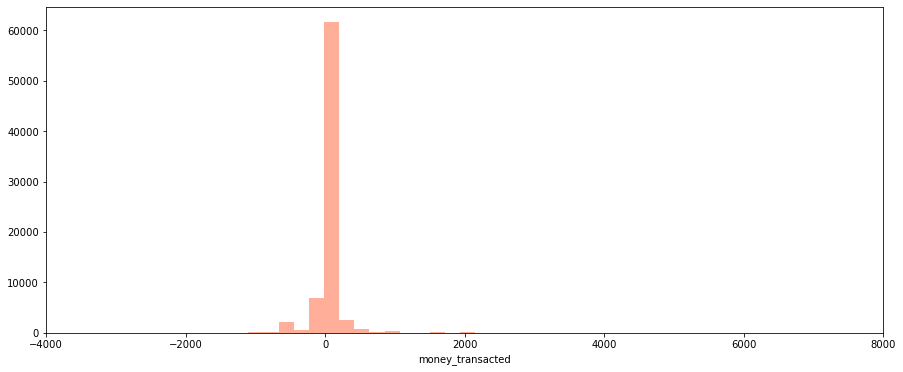

In [28]:
plt.figure(figsize = (15,6))
sns.distplot(df['money_transacted'],kde = False, bins = 1000,color = '#ff3800')
plt.xlim((-4000,8000));     # I have used this  range to observe the most of the distribution

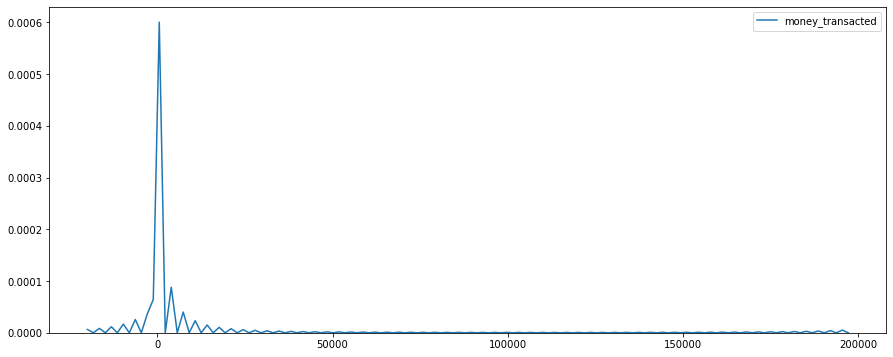

In [29]:
plt.figure(figsize = (15,6))
sns.kdeplot(df['money_transacted']);
plt.savefig('kde.png')
#plt.xlim((-4000,8000));   # Most of the transactopn amounts lie between -1000 and 1000

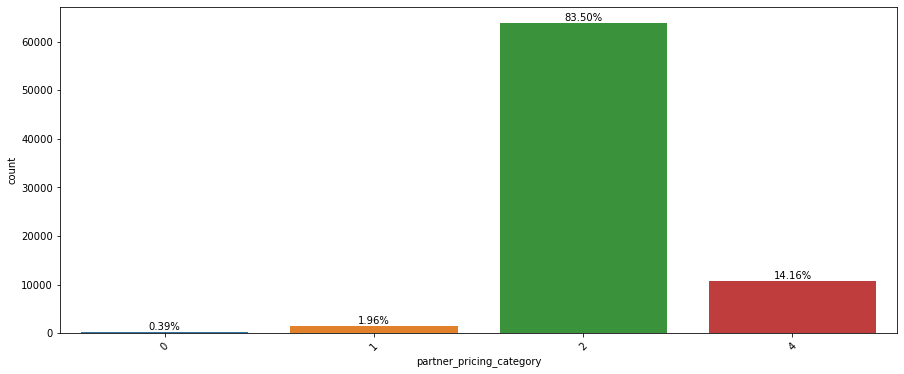

In [30]:
barplot('partner_pricing_category',df)  # Most of the transactions are done by partner pricing category 2

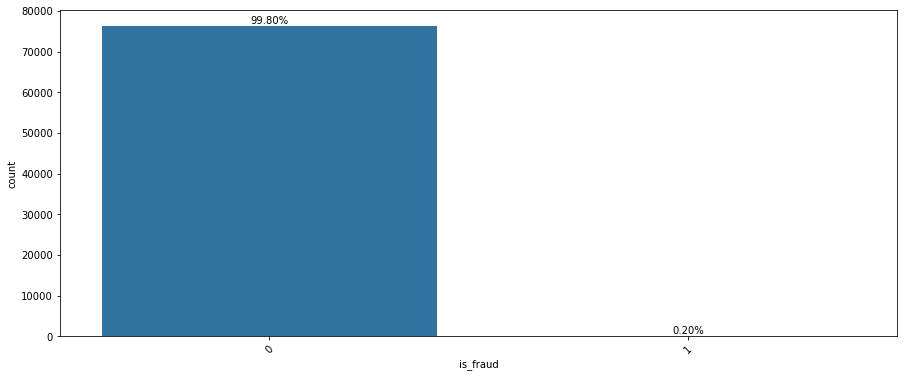

In [31]:
barplot('is_fraud',df) # Here we can see that the fraudlent transactions are almost negligible

In [32]:
df.dtypes

user_id                     category
payment_method              category
partner_id                  category
partner_category            category
device_type                 category
money_transacted             float64
partner_pricing_category    category
is_fraud                    category
transaction_year               int64
transaction_date               int64
transaction_month              int64
transaction_hour               int64
transaction_weekday            int64
dtype: object

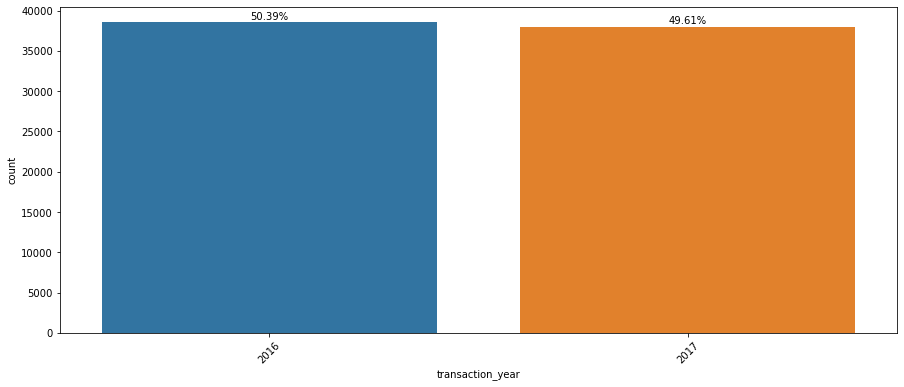

In [33]:
barplot('transaction_year', df)  # Transactions are done equally in both the years

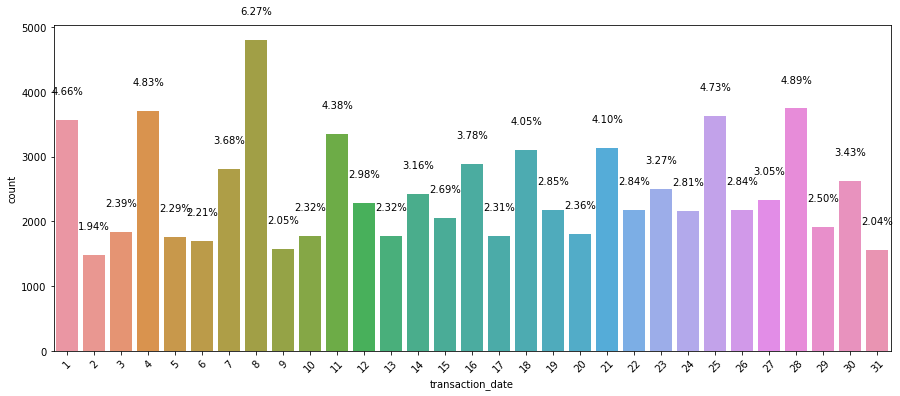

In [34]:
barplot('transaction_date', df)  # THere is no particular day which has high number of transactions

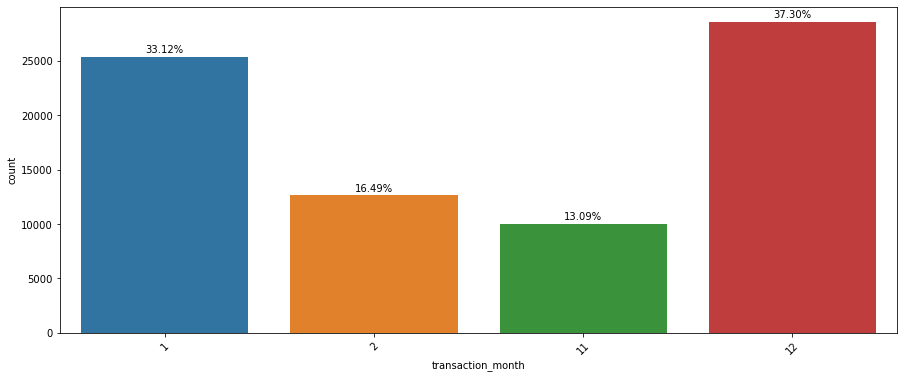

In [35]:
barplot('transaction_month',df)   # Only four month data has given to us

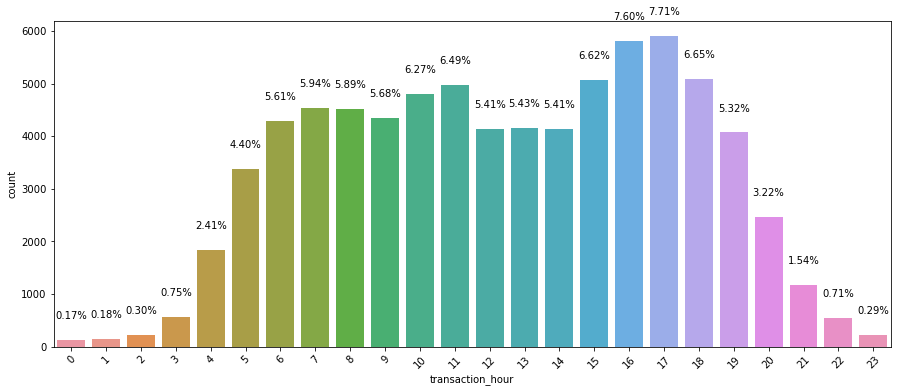

In [36]:
barplot('transaction_hour',df) # Most of the transactions are done between 5 am and 10 pm

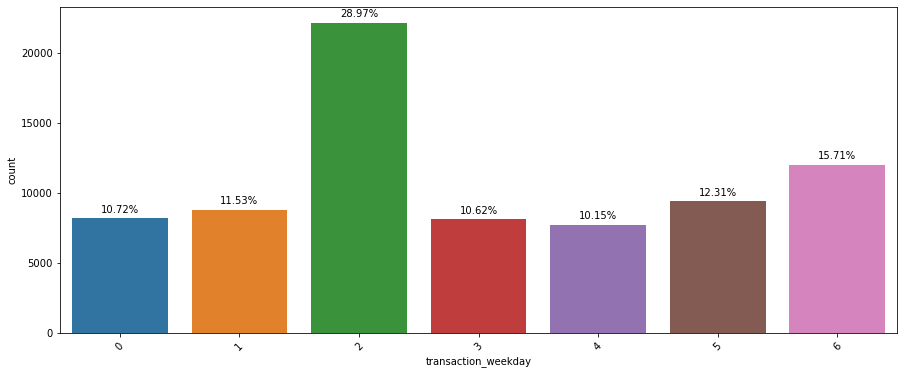

In [37]:
barplot('transaction_weekday',df) 
# 0- Monday, 6 - Sunday, 30% of the transactions are done on Wednesday, and almost equal transactions on all other days

## BiVariate Analysis

In [38]:
def getProbOfisfraud(col, target, df, forGraph=True):
    crosstab = pd.crosstab(index = df[col], columns = df[target])
    crosstab.columns = pd.Index(list(crosstab.columns))
    crosstab = crosstab.reset_index() 
    crosstab['TotalCount'] = crosstab[1] + crosstab[0]
    crosstab['probisfraud'] = crosstab[1] / crosstab['TotalCount']
    
    print(crosstab.head(31))
    if forGraph:
        return crosstab[[col, 'probisfraud']]
    else:
        return crosstab[[col, 'TotalCount', 'probofisfraud']]

   transaction_weekday      0   1  TotalCount  probisfraud
0                    0   8186  19        8205     0.002316
1                    1   8795  28        8823     0.003174
2                    2  22149  22       22171     0.000992
3                    3   8102  23        8125     0.002831
4                    4   7752  13        7765     0.001674
5                    5   9396  24        9420     0.002548
6                    6  11995  25       12020     0.002080


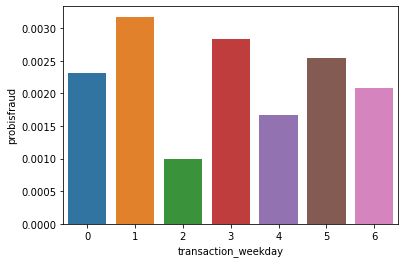

In [39]:
sns.barplot(x = 'transaction_weekday',y = 'probisfraud', data=getProbOfisfraud('transaction_weekday', 'is_fraud',df));
# There is no particular day which has high frauds

    transaction_date     0   1  TotalCount  probisfraud
0                  1  3546  18        3564     0.005051
1                  2  1479   5        1484     0.003369
2                  3  1829   1        1830     0.000546
3                  4  3684  13        3697     0.003516
4                  5  1751   0        1751     0.000000
5                  6  1686   4        1690     0.002367
6                  7  2815   0        2815     0.000000
7                  8  4796   1        4797     0.000208
8                  9  1566   2        1568     0.001276
9                 10  1765  13        1778     0.007312
10                11  3345   8        3353     0.002386
11                12  2267  13        2280     0.005702
12                13  1773   0        1773     0.000000
13                14  2415   2        2417     0.000827
14                15  2053   4        2057     0.001945
15                16  2889   2        2891     0.000692
16                17  1762   5        1767     0

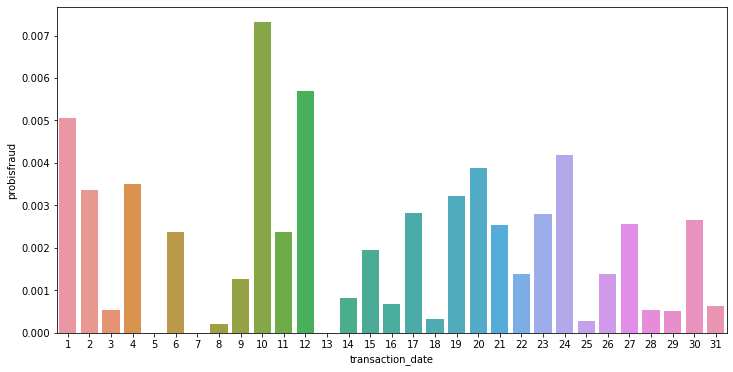

In [40]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'transaction_date',y = 'probisfraud', data=getProbOfisfraud('transaction_date', 'is_fraud',df));
# Month end has less frauds compared to month start

   transaction_month      0   1  TotalCount  probisfraud
0                  1  25295  50       25345     0.001973
1                  2  12578  43       12621     0.003407
2                 11  10004  11       10015     0.001098
3                 12  28498  50       28548     0.001751


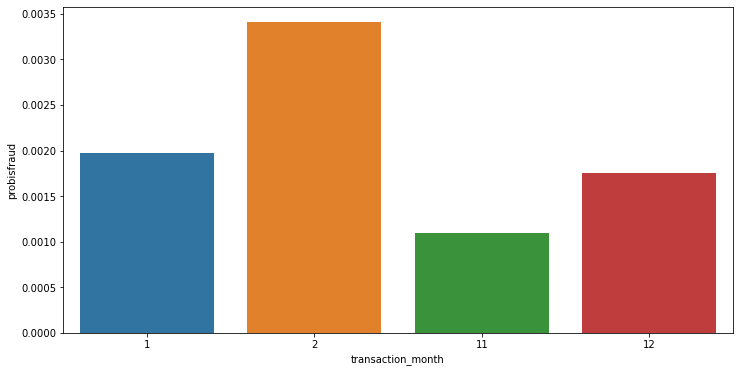

In [41]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'transaction_month',y = 'probisfraud', data=getProbOfisfraud('transaction_month', 'is_fraud',df));
# Frauds have been gradually increasing every month

   transaction_year      0   1  TotalCount  probisfraud
0              2016  38502  61       38563     0.001582
1              2017  37873  93       37966     0.002450


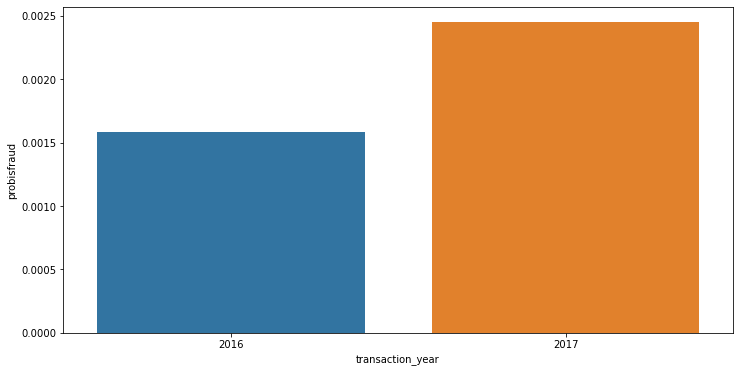

In [42]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'transaction_year',y = 'probisfraud', data=getProbOfisfraud('transaction_year', 'is_fraud',df));
# Cases have increase from last twomonths to next two months

    transaction_hour     0   1  TotalCount  probisfraud
0                  0   132   1         133     0.007519
1                  1   141   0         141     0.000000
2                  2   231   0         231     0.000000
3                  3   569   6         575     0.010435
4                  4  1841   0        1841     0.000000
5                  5  3364   5        3369     0.001484
6                  6  4284   6        4290     0.001399
7                  7  4534   9        4543     0.001981
8                  8  4505   4        4509     0.000887
9                  9  4339   6        4345     0.001381
10                10  4793   2        4795     0.000417
11                11  4964   6        4970     0.001207
12                12  4117  23        4140     0.005556
13                13  4142  16        4158     0.003848
14                14  4133   7        4140     0.001691
15                15  5056   7        5063     0.001383
16                16  5801  13        5814     0

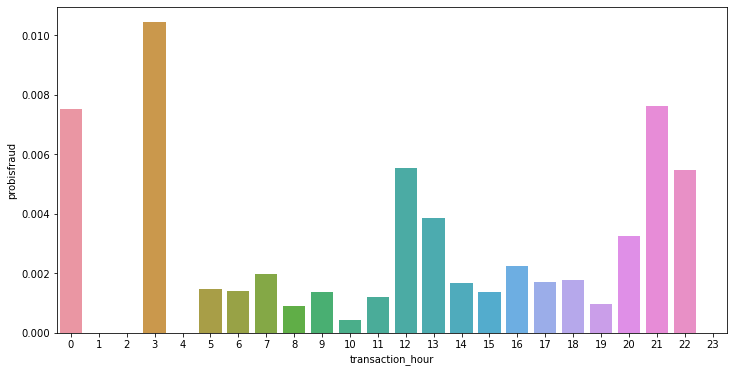

In [43]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'transaction_hour',y = 'probisfraud', data=getProbOfisfraud('transaction_hour', 'is_fraud',df));
# Frauds are high during night

  partner_pricing_category      0    1  TotalCount  probisfraud
0                        0    271   29         300     0.096667
1                        1   1491    6        1497     0.004008
2                        2  63789  110       63899     0.001721
3                        4  10824    9       10833     0.000831


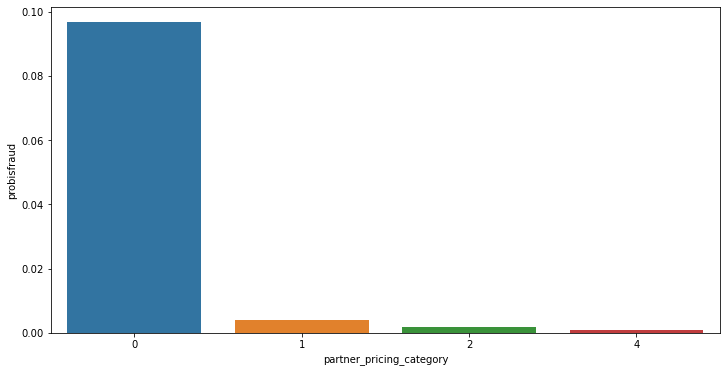

In [44]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'partner_pricing_category',y = 'probisfraud', data=getProbOfisfraud('partner_pricing_category', 'is_fraud',df));
# Category 0 has high fraud cases percentage, where as 2 has high cases

       device_type      0    1  TotalCount  probisfraud
0  android_devices  29657    5       29662     0.000169
1      ios_devices    876    0         876     0.000000
2        other_pcs  45415  145       45560     0.003183
3      windows_pcs    427    4         431     0.009281


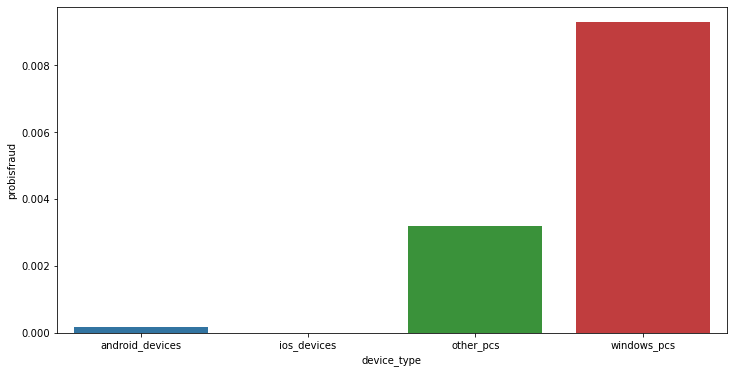

In [45]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'device_type',y = 'probisfraud', data=getProbOfisfraud('device_type', 'is_fraud',df));
# Other Pcs have high cases among all and also high transactions

  partner_category      0    1  TotalCount  probisfraud
0            cat_1  36178  128       36306     0.003526
1            cat_2  36004   15       36019     0.000416
2            cat_3   1527    9        1536     0.005859
3            cat_4   1310    0        1310     0.000000
4            cat_5   1026    0        1026     0.000000
5            cat_6    146    0         146     0.000000
6            cat_7    165    0         165     0.000000
7            cat_8     17    2          19     0.105263
8            cat_9      2    0           2     0.000000


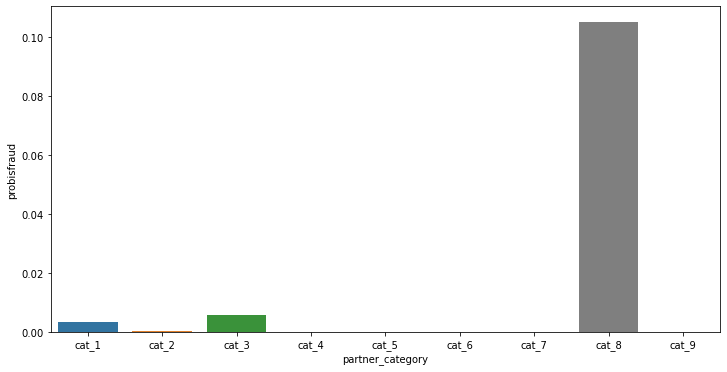

In [46]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'partner_category',y = 'probisfraud', data=getProbOfisfraud('partner_category', 'is_fraud',df));
# Cat_1 has high fraud cases but low percentage

In [47]:
df.dtypes

user_id                     category
payment_method              category
partner_id                  category
partner_category            category
device_type                 category
money_transacted             float64
partner_pricing_category    category
is_fraud                    category
transaction_year               int64
transaction_date               int64
transaction_month              int64
transaction_hour               int64
transaction_weekday            int64
dtype: object

   partner_id      0    1  TotalCount  probisfraud
0        7889   2317    0        2317     0.000000
1       15778    189    0         189     0.000000
2       23667  19517    9       19526     0.000461
3       31556   1892    0        1892     0.000000
4       39445     17    2          19     0.105263
5       47334  26104    1       26105     0.000038
6       55223     75    0          75     0.000000
7       63112    159    0         159     0.000000
8       71001     12    3          15     0.200000
9       78890  12267    6       12273     0.000489
10      86779   1121    0        1121     0.000000
11      94668      2    0           2     0.000000
12     102557    227    4         231     0.017316
13     110446    640    0         640     0.000000
14     118335   9422  124        9546     0.012990
15     126224     10    0          10     0.000000
16     149891    767    0         767     0.000000
17     157780    165    0         165     0.000000
18     165669   1212    4      

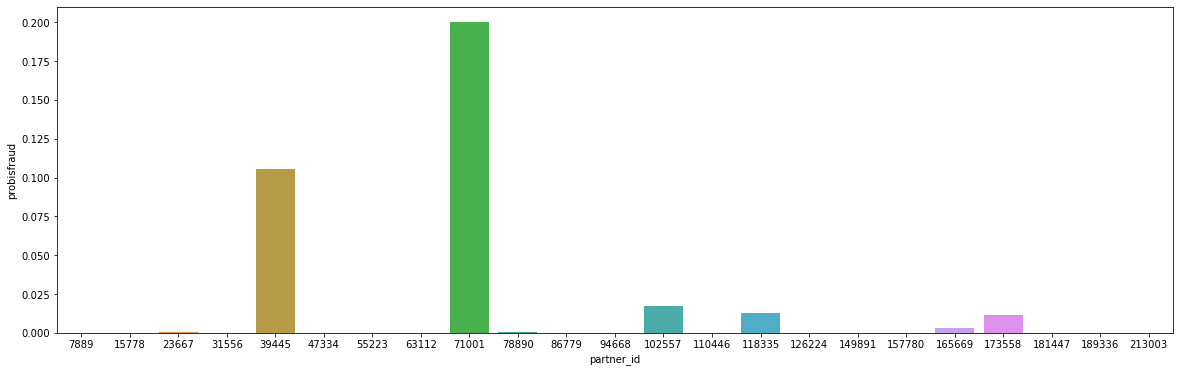

In [48]:
plt.figure(figsize = (20,6))
sns.barplot(x = 'partner_id',y = 'probisfraud', data=getProbOfisfraud('partner_id', 'is_fraud',df));
# 118335 has shigh fraud cases

               payment_method      0   1  TotalCount  probisfraud
0           e_wallet_payments  27382   2       27384     0.000073
1           other_debit_cards   4452  43        4495     0.009566
2      sbi_atm_cum_debit_card  30533   5       30538     0.000164
3  unified_payments_interface     15   0          15     0.000000
4    visa_master_credit_cards   2401  53        2454     0.021597
5     visa_master_debit_cards  11592  51       11643     0.004380


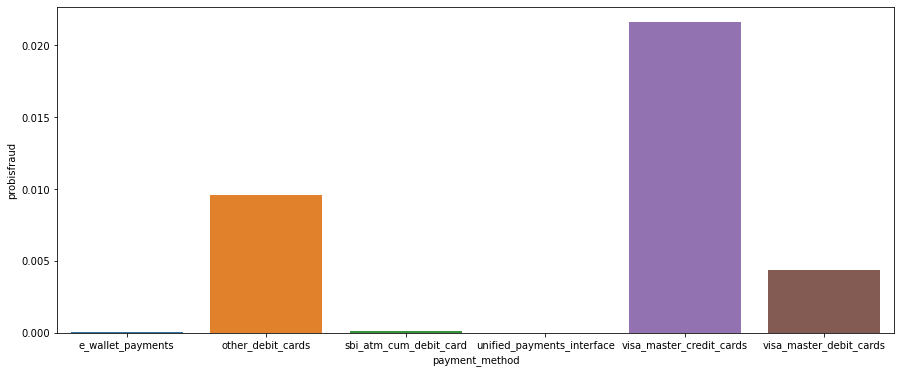

In [49]:
plt.figure(figsize = (15,6))
sns.barplot(x = 'payment_method',y = 'probisfraud', data=getProbOfisfraud('payment_method', 'is_fraud',df));
# Around 100 transactions are from visa and master cards

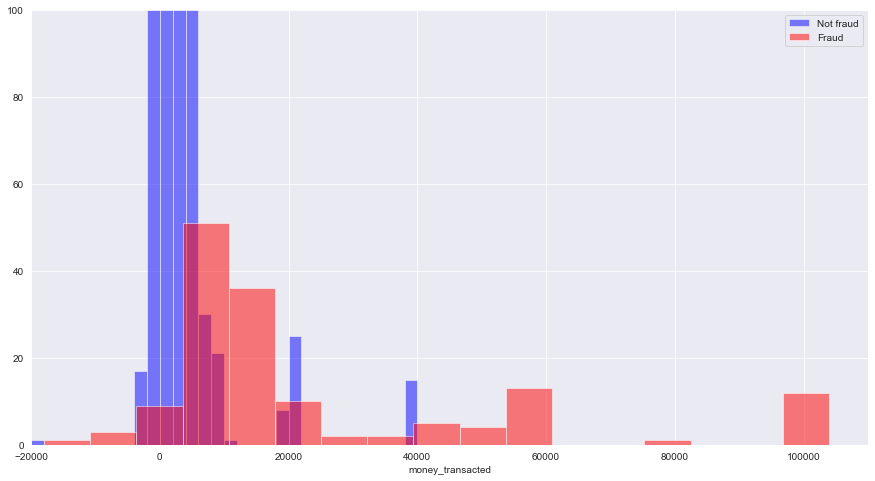

In [50]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
df[df['is_fraud']== 0]['money_transacted'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Not fraud')
df[df['is_fraud']==1]['money_transacted'].hist(alpha=0.5,color='red',
                                              bins=30,label='Fraud')
plt.legend()
plt.xlabel('money_transacted')
plt.xlim(-20000,110000)
plt.ylim(0,100);
# I gave a limit of 100 to inderstand the split of fraud transactions

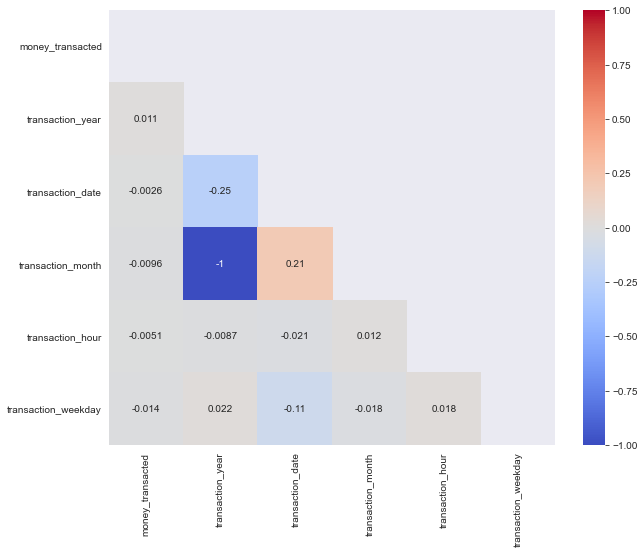

In [51]:
cm = df.corr()
mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,8))
sns.heatmap(cm,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=True,
            mask = mask);


In [52]:
## There is no correlation between the money transacted and the year, date, month, hour, weekday

## Feature Engineering

In [53]:
df['credit'] = np.nan
for i in range(len(df)):
    if df.loc[i, 'money_transacted'] < 0:
        df.loc[i, 'credit'] = 1
    elif df.loc[i, 'money_transacted'] > 0:
        df.loc[i, 'credit'] = 0
        
df['credit'] = df['credit'].astype('int64')
df['money_transacted'] = abs(df['money_transacted'])
df.head()

# Making the money as positive value by using credit row

,user_id,payment_method,partner_id,partner_category,device_type,money_transacted,partner_pricing_category,is_fraud,transaction_year,transaction_date,transaction_month,transaction_hour,transaction_weekday,credit
0,17539344,sbi_atm_cum_debit_card,47334,cat_1,android_devices,5.0,2,0,2016,15,11,19,1,1
1,24710841,e_wallet_payments,78890,cat_2,other_pcs,100.0,2,0,2017,11,1,9,2,0
2,24265476,e_wallet_payments,78890,cat_2,other_pcs,50.0,2,0,2016,7,12,7,2,0
3,10240000,other_debit_cards,102557,cat_3,other_pcs,1000.0,2,0,2017,11,1,16,2,0
4,5880625,other_debit_cards,118335,cat_1,other_pcs,200.0,2,0,2016,16,11,17,2,0


In [54]:
bins = list(np.arange(np.min(df['transaction_date']), np.max(df['transaction_date'])+5, 4))
print(bins)

labels = bins[:-1]
print(labels)
df['date_binned'] = pd.cut(df['transaction_date'], bins=bins, labels=labels, include_lowest=True)

print(df['date_binned'].value_counts())

# Binning these because they have same probability values and to reduce sparcity

[1, 5, 9, 13, 17, 21, 25, 29, 33]
[1, 5, 9, 13, 17, 21, 25, 29]
1     12326
5     10870
21    10452
17    10222
25    10159
9      9184
13     9132
29     4184
Name: date_binned, dtype: int64


In [55]:
bins = list(np.arange(np.min(df['transaction_hour']), np.max(df['transaction_hour'])+4, 6))
print(bins)

labels = bins[:-1]
print(labels)
df['hour_binned'] = pd.cut(df['transaction_hour'], bins=bins, labels=labels, include_lowest=True)

print(df['hour_binned'].value_counts())
# Binning these because they have same probability values and to reduce sparcity

[0, 6, 12, 18, 24]
[0, 6, 12, 18]
12    30167
6     27302
0     10580
18     8480
Name: hour_binned, dtype: int64


In [56]:
df.drop(['transaction_date', 'transaction_hour'], axis = 1, inplace = True)

In [57]:
df.head()

,user_id,payment_method,partner_id,partner_category,device_type,money_transacted,partner_pricing_category,is_fraud,transaction_year,transaction_month,transaction_weekday,credit,date_binned,hour_binned
0,17539344,sbi_atm_cum_debit_card,47334,cat_1,android_devices,5.0,2,0,2016,11,1,1,13,18
1,24710841,e_wallet_payments,78890,cat_2,other_pcs,100.0,2,0,2017,1,2,0,9,6
2,24265476,e_wallet_payments,78890,cat_2,other_pcs,50.0,2,0,2016,12,2,0,5,6
3,10240000,other_debit_cards,102557,cat_3,other_pcs,1000.0,2,0,2017,1,2,0,9,12
4,5880625,other_debit_cards,118335,cat_1,other_pcs,200.0,2,0,2016,11,2,0,13,12


In [58]:
df.dtypes

user_id                     category
payment_method              category
partner_id                  category
partner_category            category
device_type                 category
money_transacted             float64
partner_pricing_category    category
is_fraud                    category
transaction_year               int64
transaction_month              int64
transaction_weekday            int64
credit                         int64
date_binned                 category
hour_binned                 category
dtype: object

In [59]:
df[['transaction_year', 'transaction_month','transaction_weekday', 'credit']] = df[['transaction_year', 'transaction_month','transaction_weekday', 'credit']].astype('category')
df.dtypes

user_id                     category
payment_method              category
partner_id                  category
partner_category            category
device_type                 category
money_transacted             float64
partner_pricing_category    category
is_fraud                    category
transaction_year            category
transaction_month           category
transaction_weekday         category
credit                      category
date_binned                 category
hour_binned                 category
dtype: object

In [60]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

import statsmodels.api as sm

In [61]:
# CHecking the dependency of the columns

def find_chi2_independence(cat_col, target, df, alpha=0.05):
    data = df[[target, cat_col]]
    tab = sm.stats.Table.from_data(data)
    tab = tab.table_orig.to_numpy()
    print(f"---------------{target} Vs {cat_col} Chi Square Test of Independence -------------------")
    print(f"\n Contingency table :\n")
    print(tab)
    
    stat, p, dof, expected = chi2_contingency(tab)
    print(f"\n Expected table :\n")
    print(expected)
    
    print(f"The p value returned = {p} and degrees of freedom returned = {dof}")
    
    # interpret p-value
    print('significance(alpha) = %.3f' % (alpha))

    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)') 

In [62]:
cat_cols = list(df.select_dtypes('category').columns)
print(cat_cols)

['user_id', 'payment_method', 'partner_id', 'partner_category', 'device_type', 'partner_pricing_category', 'is_fraud', 'transaction_year', 'transaction_month', 'transaction_weekday', 'credit', 'date_binned', 'hour_binned']


In [63]:
for col in cat_cols:
    find_chi2_independence(col,'is_fraud',df)

---------------is_fraud Vs user_id Chi Square Test of Independence -------------------

 Contingency table :

[[ 1  1  1 ... 19  1  1]
 [ 0  0  0 ...  0  0  0]]

 Expected table :

[[9.97987691e-01 9.97987691e-01 9.97987691e-01 ... 1.89617661e+01
  9.97987691e-01 9.97987691e-01]
 [2.01230906e-03 2.01230906e-03 2.01230906e-03 ... 3.82338721e-02
  2.01230906e-03 2.01230906e-03]]
The p value returned = 0.0 and degrees of freedom returned = 3593
significance(alpha) = 0.050
Dependent (reject H0)
---------------is_fraud Vs payment_method Chi Square Test of Independence -------------------

 Contingency table :

[[27382  4452 30533    15  2401 11592]
 [    2    43     5     0    53    51]]

 Expected table :

[[2.73288949e+04 4.48595467e+03 3.04765481e+04 1.49698154e+01
  2.44906179e+03 1.16195707e+04]
 [5.51050713e+01 9.04532922e+00 6.14518941e+01 3.01846359e-02
  4.93820643e+00 2.34293144e+01]]
The p value returned = 5.316478181917259e-156 and degrees of freedom returned = 5
significance(al

In [64]:
# From chi_square test, we can see that is_fraud is dependent on user_id, but due to lack of knowledge of how  to use it, I am removing it
df.drop('user_id', axis = 1, inplace=True)

In [65]:
from sklearn.feature_selection import f_classif
x = f_classif(df[['money_transacted']], df['is_fraud'])
x[1] > 0.05
# The f_classification value is less than 0.05 so the money column is significant for model building

array([False])

In [66]:
df.head().T

,0,1,2,3,4
payment_method,sbi_atm_cum_debit_card,e_wallet_payments,e_wallet_payments,other_debit_cards,other_debit_cards
partner_id,47334,78890,78890,102557,118335
partner_category,cat_1,cat_2,cat_2,cat_3,cat_1
device_type,android_devices,other_pcs,other_pcs,other_pcs,other_pcs
money_transacted,5,100,50,1000,200
partner_pricing_category,2,2,2,2,2
is_fraud,0,0,0,0,0
transaction_year,2016,2017,2016,2017,2016
transaction_month,11,1,12,1,11
transaction_weekday,1,2,2,2,2


In [67]:
df.shape

(76529, 13)

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn_pandas import DataFrameMapper
from sklearn.model_selection import StratifiedShuffleSplit

from xgboost import XGBClassifier

# Splitting train and validation data

In [69]:
y=df["is_fraud"]
X=df.drop('is_fraud', axis=1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20,random_state=340, stratify=y)

In [70]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(61223, 12)
(15306, 12)
(61223,)
(15306,)


## Imputation

In [71]:
num_attr = list(df.select_dtypes('float64').columns)
print(num_attr)
cat_attr = ['payment_method', 'partner_id', 'partner_category', 'device_type', 'partner_pricing_category', 'transaction_year', 'transaction_month', 'transaction_weekday', 'credit', 'date_binned', 'hour_binned']
print(cat_attr)

['money_transacted']
['payment_method', 'partner_id', 'partner_category', 'device_type', 'partner_pricing_category', 'transaction_year', 'transaction_month', 'transaction_weekday', 'credit', 'date_binned', 'hour_binned']


In [72]:
imputer = SimpleImputer(strategy='median')

imputer = imputer.fit(X_train[num_attr])

X_train[num_attr] = imputer.transform(X_train[num_attr])
X_val[num_attr] = imputer.transform(X_val[num_attr])

# Imputing even though we don't have NAs, because in future this might help

In [73]:
imputer = SimpleImputer(strategy='most_frequent')

imputer = imputer.fit(X_train[cat_attr])

X_train[cat_attr] = imputer.transform(X_train[cat_attr])
X_val[cat_attr] = imputer.transform(X_val[cat_attr])

In [74]:
mapper = DataFrameMapper(
  [([continuous_col], StandardScaler()) for continuous_col in num_attr] +
  [([categorical_col], OneHotEncoder(handle_unknown='error')) for categorical_col in cat_attr]
, df_out=True)

# Doing this so that all columns will have equal importance

In [75]:
mapper.fit(X_train)

X_train_final = mapper.transform(X_train)
X_val_final = mapper.transform(X_val)

In [76]:
X_train_final.head()

,money_transacted,payment_method_x0_e_wallet_payments,payment_method_x0_other_debit_cards,payment_method_x0_sbi_atm_cum_debit_card,payment_method_x0_unified_payments_interface,payment_method_x0_visa_master_credit_cards,payment_method_x0_visa_master_debit_cards,partner_id_x0_7889,partner_id_x0_15778,partner_id_x0_23667,...,date_binned_x0_9,date_binned_x0_13,date_binned_x0_17,date_binned_x0_21,date_binned_x0_25,date_binned_x0_29,hour_binned_x0_0,hour_binned_x0_6,hour_binned_x0_12,hour_binned_x0_18
14525,0.000197,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9243,-0.055684,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
69178,-0.039718,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
68162,0.005785,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27512,-0.075641,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [77]:
X_train_final.shape

(61223, 74)

In [78]:
X_train_final.columns

Index(['money_transacted', 'payment_method_x0_e_wallet_payments',
       'payment_method_x0_other_debit_cards',
       'payment_method_x0_sbi_atm_cum_debit_card',
       'payment_method_x0_unified_payments_interface',
       'payment_method_x0_visa_master_credit_cards',
       'payment_method_x0_visa_master_debit_cards', 'partner_id_x0_7889',
       'partner_id_x0_15778', 'partner_id_x0_23667', 'partner_id_x0_31556',
       'partner_id_x0_39445', 'partner_id_x0_47334', 'partner_id_x0_55223',
       'partner_id_x0_63112', 'partner_id_x0_71001', 'partner_id_x0_78890',
       'partner_id_x0_86779', 'partner_id_x0_94668', 'partner_id_x0_102557',
       'partner_id_x0_110446', 'partner_id_x0_118335', 'partner_id_x0_126224',
       'partner_id_x0_149891', 'partner_id_x0_157780', 'partner_id_x0_165669',
       'partner_id_x0_173558', 'partner_id_x0_181447', 'partner_id_x0_189336',
       'partner_id_x0_213003', 'partner_category_x0_cat_1',
       'partner_category_x0_cat_2', 'partner_category

## Error metrics

In [79]:
def classifcation_report_and_CM_train_test(train, train_pred, val, val_pred):

    print('''
            =========================================================
            CLASSIFICATION REPORT AND CONFUSION MATRIX FOR TRAIN DATA
            =========================================================
            ''')
    print(pd.crosstab(train, train_pred, rownames=['Actual'], colnames=['Predicted']))
    print(classification_report(train, train_pred, digits=4))
    

    print('''
            =========================================================
            CLASSIFICATION REPORT AND CONFUSION MATRIX FOR Val DATA
            =========================================================
            ''')
    print(pd.crosstab(val, val_pred, rownames=['Actual'], colnames=['Predicted']))
    print(classification_report(val, val_pred, digits=4))




# Code to printout entire table #
scores = pd.DataFrame(columns=['Model','Train_F1_Score','Val_F1_Score','Train_Recall','Val_Recall','Train_Precision','Val_Precision','Train_Accuracy','Val_Accuracy',])

def get_metrics(train_actual,train_predicted,val_actual,val_predicted,model_description,dataframe):
    classifcation_report_and_CM_train_test(train_actual,train_predicted,val_actual,val_predicted)
    train_accuracy = accuracy_score(train_actual,train_predicted)
    
    train_recall   = recall_score(train_actual,train_predicted)
    
    train_precision= precision_score(train_actual,train_predicted)
    
    train_f1score  = f1_score(train_actual,train_predicted)
    
    val_accuracy = accuracy_score(val_actual,val_predicted)
    
    val_recall   = recall_score(val_actual,val_predicted)
    
    val_precision= precision_score(val_actual,val_predicted)
    
    val_f1score  = f1_score(val_actual,val_predicted)
    
    dataframe = dataframe.append(pd.Series([model_description, train_f1score, val_f1score,train_recall,val_recall,train_precision,val_precision,
                                            train_accuracy,val_accuracy],
                                           index=scores.columns ), ignore_index=True)
    
    return(dataframe)


## Model Building

## Logistic Regression

In [80]:
log_mod = LogisticRegression(random_state=340)
log_mod.fit(X_train_final, y_train)

y_pred_train = log_mod.predict(X_train_final)
y_pred_val = log_mod.predict(X_val_final)

In [81]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"LogisticRegression",scores)
scores


            CLASSIFICATION REPORT AND CONFUSION MATRIX FOR TRAIN DATA
            
Predicted      0   1
Actual              
0          61077  23
1             78  45
              precision    recall  f1-score   support

           0     0.9987    0.9996    0.9992     61100
           1     0.6618    0.3659    0.4712       123

    accuracy                         0.9984     61223
   macro avg     0.8302    0.6827    0.7352     61223
weighted avg     0.9980    0.9984    0.9981     61223


            CLASSIFICATION REPORT AND CONFUSION MATRIX FOR Val DATA
            
Predicted      0  1
Actual             
0          15268  7
1             24  7
              precision    recall  f1-score   support

           0     0.9984    0.9995    0.9990     15275
           1     0.5000    0.2258    0.3111        31

    accuracy                         0.9980     15306
   macro avg     0.7492    0.6127    0.6550     15306
weighted avg     0.9974    0.9980    0.9976     15306



,Model,Train_F1_Score,Val_F1_Score,Train_Recall,Val_Recall,Train_Precision,Val_Precision,Train_Accuracy,Val_Accuracy
0,LogisticRegression,0.471204,0.311111,0.365854,0.225806,0.661765,0.5,0.99835,0.997975


## Logistic Regression with class_weight='balanced'

In [82]:
# Because this is class imbalance data
log_mod = LogisticRegression(class_weight='balanced', random_state=340)

log_mod.fit(X_train_final, y_train)

y_pred_train = log_mod.predict(X_train_final)
y_pred_val = log_mod.predict(X_val_final)

In [83]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"LogisticRegression Balanced",scores)
scores


            CLASSIFICATION REPORT AND CONFUSION MATRIX FOR TRAIN DATA
            
Predicted      0    1
Actual               
0          60875  225
1              0  123
              precision    recall  f1-score   support

           0     1.0000    0.9963    0.9982     61100
           1     0.3534    1.0000    0.5223       123

    accuracy                         0.9963     61223
   macro avg     0.6767    0.9982    0.7602     61223
weighted avg     0.9987    0.9963    0.9972     61223


            CLASSIFICATION REPORT AND CONFUSION MATRIX FOR Val DATA
            
Predicted      0   1
Actual              
0          15203  72
1              0  31
              precision    recall  f1-score   support

           0     1.0000    0.9953    0.9976     15275
           1     0.3010    1.0000    0.4627        31

    accuracy                         0.9953     15306
   macro avg     0.6505    0.9976    0.7302     15306
weighted avg     0.9986    0.9953    0.9966     15306



,Model,Train_F1_Score,Val_F1_Score,Train_Recall,Val_Recall,Train_Precision,Val_Precision,Train_Accuracy,Val_Accuracy
0,LogisticRegression,0.471204,0.311111,0.365854,0.225806,0.661765,0.500000,0.998350,0.997975
1,LogisticRegression Balanced,0.522293,0.462687,1.000000,1.000000,0.353448,0.300971,0.996325,0.995296


## Decision Tree Basic

In [84]:
clf_dt = DecisionTreeClassifier(random_state=340)

clf_dt.fit(X_train_final,y_train)

y_pred_train = clf_dt.predict(X_train_final)
y_pred_val = clf_dt.predict(X_val_final)

In [85]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"DecisionTree Normal",scores)
scores


            CLASSIFICATION REPORT AND CONFUSION MATRIX FOR TRAIN DATA
            
Predicted      0    1
Actual               
0          61099    1
1              3  120
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000     61100
           1     0.9917    0.9756    0.9836       123

    accuracy                         0.9999     61223
   macro avg     0.9958    0.9878    0.9918     61223
weighted avg     0.9999    0.9999    0.9999     61223


            CLASSIFICATION REPORT AND CONFUSION MATRIX FOR Val DATA
            
Predicted      0   1
Actual              
0          15274   1
1              5  26
              precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998     15275
           1     0.9630    0.8387    0.8966        31

    accuracy                         0.9996     15306
   macro avg     0.9813    0.9193    0.9482     15306
weighted avg     0.9996    0.9996    0.9996     15306



,Model,Train_F1_Score,Val_F1_Score,Train_Recall,Val_Recall,Train_Precision,Val_Precision,Train_Accuracy,Val_Accuracy
0,LogisticRegression,0.471204,0.311111,0.365854,0.225806,0.661765,0.500000,0.998350,0.997975
1,LogisticRegression Balanced,0.522293,0.462687,1.000000,1.000000,0.353448,0.300971,0.996325,0.995296
2,DecisionTree Normal,0.983607,0.896552,0.975610,0.838710,0.991736,0.962963,0.999935,0.999608


## Decision Tree Balanced

In [86]:
clf_dt_bal = DecisionTreeClassifier(random_state=340, class_weight = 'balanced')

clf_dt_bal.fit(X_train_final,y_train)

y_pred_train = clf_dt_bal.predict(X_train_final)
y_pred_val = clf_dt_bal.predict(X_val_final)

In [87]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"DecisionTree Balanced",scores)
scores


            CLASSIFICATION REPORT AND CONFUSION MATRIX FOR TRAIN DATA
            
Predicted      0    1
Actual               
0          61096    4
1              0  123
              precision    recall  f1-score   support

           0     1.0000    0.9999    1.0000     61100
           1     0.9685    1.0000    0.9840       123

    accuracy                         0.9999     61223
   macro avg     0.9843    1.0000    0.9920     61223
weighted avg     0.9999    0.9999    0.9999     61223


            CLASSIFICATION REPORT AND CONFUSION MATRIX FOR Val DATA
            
Predicted      0   1
Actual              
0          15272   3
1              4  27
              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9998     15275
           1     0.9000    0.8710    0.8852        31

    accuracy                         0.9995     15306
   macro avg     0.9499    0.9354    0.9425     15306
weighted avg     0.9995    0.9995    0.9995     15306



,Model,Train_F1_Score,Val_F1_Score,Train_Recall,Val_Recall,Train_Precision,Val_Precision,Train_Accuracy,Val_Accuracy
0,LogisticRegression,0.471204,0.311111,0.365854,0.225806,0.661765,0.500000,0.998350,0.997975
1,LogisticRegression Balanced,0.522293,0.462687,1.000000,1.000000,0.353448,0.300971,0.996325,0.995296
2,DecisionTree Normal,0.983607,0.896552,0.975610,0.838710,0.991736,0.962963,0.999935,0.999608
3,DecisionTree Balanced,0.984000,0.885246,1.000000,0.870968,0.968504,0.900000,0.999935,0.999543


In [88]:
clf_dt_bal.get_params()

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 340,
 'splitter': 'best'}

In [89]:
clf_dt_bal.tree_.max_depth

16

In [90]:
features = X_train_final.columns
importances = clf_dt_bal.feature_importances_

indices = np.argsort(importances)[::-1]

pd.DataFrame([X_train_final.columns[indices],np.sort(importances)[::-1]])

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,money_transacted,hour_binned_x0_18,payment_method_x0_visa_master_credit_cards,date_binned_x0_21,partner_id_x0_55223,transaction_weekday_x0_0,transaction_weekday_x0_1,transaction_month_x0_1,payment_method_x0_e_wallet_payments,partner_category_x0_cat_7,...,partner_id_x0_149891,partner_category_x0_cat_2,transaction_month_x0_11,partner_id_x0_213003,partner_id_x0_189336,partner_id_x0_181447,partner_id_x0_173558,partner_id_x0_165669,partner_id_x0_157780,partner_category_x0_cat_6
1,0.969777,0.00808261,0.00772457,0.00627514,0.00132295,0.00119464,0.00113793,0.00105814,0.000904511,0.000840653,...,0,0,0,0,0,0,0,0,0,0


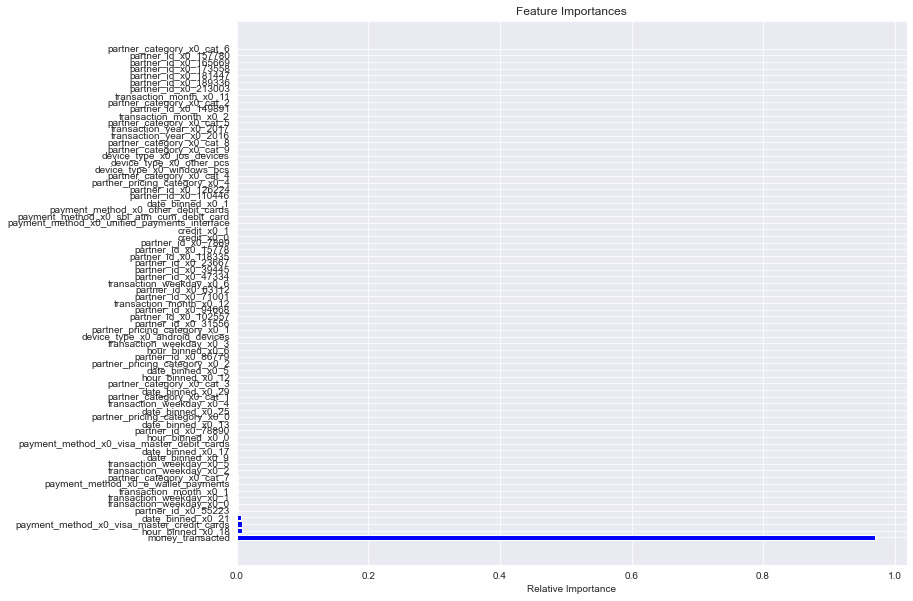

In [91]:
plt.figure(figsize = (12,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [92]:
imp_indices = []
for x in indices:
    if importances[x] > 0:
        imp_indices.append(x)
        
print(imp_indices)
print(len(imp_indices))

[0, 73, 5, 67, 13, 53, 54, 49, 1, 36, 55, 58, 64, 66, 6, 70, 16, 65, 43, 68, 57, 30, 69, 32, 72, 63, 45, 17, 71, 56, 39]
31


In [93]:
imp_cols = list(X_train_final.columns[imp_indices])
print(imp_cols)

['money_transacted', 'hour_binned_x0_18', 'payment_method_x0_visa_master_credit_cards', 'date_binned_x0_21', 'partner_id_x0_55223', 'transaction_weekday_x0_0', 'transaction_weekday_x0_1', 'transaction_month_x0_1', 'payment_method_x0_e_wallet_payments', 'partner_category_x0_cat_7', 'transaction_weekday_x0_2', 'transaction_weekday_x0_5', 'date_binned_x0_9', 'date_binned_x0_17', 'payment_method_x0_visa_master_debit_cards', 'hour_binned_x0_0', 'partner_id_x0_78890', 'date_binned_x0_13', 'partner_pricing_category_x0_0', 'date_binned_x0_25', 'transaction_weekday_x0_4', 'partner_category_x0_cat_1', 'date_binned_x0_29', 'partner_category_x0_cat_3', 'hour_binned_x0_12', 'date_binned_x0_5', 'partner_pricing_category_x0_2', 'partner_id_x0_86779', 'hour_binned_x0_6', 'transaction_weekday_x0_3', 'device_type_x0_android_devices']


In [94]:
%time clf_dt_bal.fit(X_train_final[imp_cols], y_train)

Wall time: 231 ms


DecisionTreeClassifier(class_weight='balanced', random_state=340)

In [95]:
y_pred_train = clf_dt_bal.predict(X_train_final[imp_cols])
y_pred_val = clf_dt_bal.predict(X_val_final[imp_cols])

In [96]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"DecisionTree Imp Params",scores)
scores


            CLASSIFICATION REPORT AND CONFUSION MATRIX FOR TRAIN DATA
            
Predicted      0    1
Actual               
0          61096    4
1              0  123
              precision    recall  f1-score   support

           0     1.0000    0.9999    1.0000     61100
           1     0.9685    1.0000    0.9840       123

    accuracy                         0.9999     61223
   macro avg     0.9843    1.0000    0.9920     61223
weighted avg     0.9999    0.9999    0.9999     61223


            CLASSIFICATION REPORT AND CONFUSION MATRIX FOR Val DATA
            
Predicted      0   1
Actual              
0          15272   3
1              4  27
              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9998     15275
           1     0.9000    0.8710    0.8852        31

    accuracy                         0.9995     15306
   macro avg     0.9499    0.9354    0.9425     15306
weighted avg     0.9995    0.9995    0.9995     15306



,Model,Train_F1_Score,Val_F1_Score,Train_Recall,Val_Recall,Train_Precision,Val_Precision,Train_Accuracy,Val_Accuracy
0,LogisticRegression,0.471204,0.311111,0.365854,0.225806,0.661765,0.500000,0.998350,0.997975
1,LogisticRegression Balanced,0.522293,0.462687,1.000000,1.000000,0.353448,0.300971,0.996325,0.995296
2,DecisionTree Normal,0.983607,0.896552,0.975610,0.838710,0.991736,0.962963,0.999935,0.999608
3,DecisionTree Balanced,0.984000,0.885246,1.000000,0.870968,0.968504,0.900000,0.999935,0.999543
4,DecisionTree Imp Params,0.984000,0.885246,1.000000,0.870968,0.968504,0.900000,0.999935,0.999543


## Random Forests

In [97]:
rfc = RandomForestClassifier(random_state=340, class_weight = 'balanced', n_estimators = 71, min_samples_split = 0.05, 
                             max_features = 0.46, max_depth = 10)

rfc.fit(X_train_final,y_train)

y_pred_train = rfc.predict(X_train_final)
y_pred_val = rfc.predict(X_val_final)

In [98]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"Random Forest Classifier",scores)
scores


            CLASSIFICATION REPORT AND CONFUSION MATRIX FOR TRAIN DATA
            
Predicted      0    1
Actual               
0          60556  544
1              1  122
              precision    recall  f1-score   support

           0     1.0000    0.9911    0.9955     61100
           1     0.1832    0.9919    0.3093       123

    accuracy                         0.9911     61223
   macro avg     0.5916    0.9915    0.6524     61223
weighted avg     0.9983    0.9911    0.9941     61223


            CLASSIFICATION REPORT AND CONFUSION MATRIX FOR Val DATA
            
Predicted      0    1
Actual               
0          15143  132
1              0   31
              precision    recall  f1-score   support

           0     1.0000    0.9914    0.9957     15275
           1     0.1902    1.0000    0.3196        31

    accuracy                         0.9914     15306
   macro avg     0.5951    0.9957    0.6576     15306
weighted avg     0.9984    0.9914    0.9943     15306



,Model,Train_F1_Score,Val_F1_Score,Train_Recall,Val_Recall,Train_Precision,Val_Precision,Train_Accuracy,Val_Accuracy
0,LogisticRegression,0.471204,0.311111,0.365854,0.225806,0.661765,0.500000,0.998350,0.997975
1,LogisticRegression Balanced,0.522293,0.462687,1.000000,1.000000,0.353448,0.300971,0.996325,0.995296
2,DecisionTree Normal,0.983607,0.896552,0.975610,0.838710,0.991736,0.962963,0.999935,0.999608
3,DecisionTree Balanced,0.984000,0.885246,1.000000,0.870968,0.968504,0.900000,0.999935,0.999543
4,DecisionTree Imp Params,0.984000,0.885246,1.000000,0.870968,0.968504,0.900000,0.999935,0.999543
5,Random Forest Classifier,0.309252,0.319588,0.991870,1.000000,0.183183,0.190184,0.991098,0.991376


## XGBoost

In [99]:
y_train.value_counts()

0    61100
1      123
Name: is_fraud, dtype: int64

In [100]:
weight = y_train[y_train ==0].count()/(y_train[y_train ==1].count()*620)
weight

0.8012063991607657

In [101]:
XGB_model = XGBClassifier(n_estimators=300, gamma=0.6,learning_rate=0.1,n_jobs = -1, scale_pos_weight=weight,min_child_weight=1)
%time XGB_model.fit(X_train_final,y_train)

Wall time: 35.3 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.6, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=0.8012063991607657,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [102]:
y_pred_train = XGB_model.predict(X_train_final)
y_pred_val = XGB_model.predict(X_val_final)

In [103]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"XGB Classifier",scores)
scores


            CLASSIFICATION REPORT AND CONFUSION MATRIX FOR TRAIN DATA
            
Predicted      0    1
Actual               
0          61096    4
1              7  116
              precision    recall  f1-score   support

           0     0.9999    0.9999    0.9999     61100
           1     0.9667    0.9431    0.9547       123

    accuracy                         0.9998     61223
   macro avg     0.9833    0.9715    0.9773     61223
weighted avg     0.9998    0.9998    0.9998     61223


            CLASSIFICATION REPORT AND CONFUSION MATRIX FOR Val DATA
            
Predicted      0   1
Actual              
0          15272   3
1              3  28
              precision    recall  f1-score   support

           0     0.9998    0.9998    0.9998     15275
           1     0.9032    0.9032    0.9032        31

    accuracy                         0.9996     15306
   macro avg     0.9515    0.9515    0.9515     15306
weighted avg     0.9996    0.9996    0.9996     15306



,Model,Train_F1_Score,Val_F1_Score,Train_Recall,Val_Recall,Train_Precision,Val_Precision,Train_Accuracy,Val_Accuracy
0,LogisticRegression,0.471204,0.311111,0.365854,0.225806,0.661765,0.500000,0.998350,0.997975
1,LogisticRegression Balanced,0.522293,0.462687,1.000000,1.000000,0.353448,0.300971,0.996325,0.995296
2,DecisionTree Normal,0.983607,0.896552,0.975610,0.838710,0.991736,0.962963,0.999935,0.999608
3,DecisionTree Balanced,0.984000,0.885246,1.000000,0.870968,0.968504,0.900000,0.999935,0.999543
4,DecisionTree Imp Params,0.984000,0.885246,1.000000,0.870968,0.968504,0.900000,0.999935,0.999543
5,Random Forest Classifier,0.309252,0.319588,0.991870,1.000000,0.183183,0.190184,0.991098,0.991376
6,XGB Classifier,0.954733,0.903226,0.943089,0.903226,0.966667,0.903226,0.999820,0.999608


In [104]:
XGB_model.feature_importances_

array([0.25844547, 0.        , 0.02339576, 0.        , 0.        ,
       0.069633  , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.04158416, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02438896, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02848642, 0.02892354,
       0.        , 0.        , 0.02038532, 0.        , 0.05293485,
       0.04313023, 0.        , 0.02235596, 0.02433014, 0.01713974,
       0.07730389, 0.01591808, 0.        , 0.02846121, 0.01698433,
       0.        , 0.        , 0.02735906, 0.00576412, 0.        ,
       0.02725582, 0.        , 0.0448911 , 0.0269742 , 0.02054522,
       0.        , 0.0223827 , 0.02159996, 0.0094268 ], dtype=

In [105]:
features = X_train_final.columns
importances = XGB_model.feature_importances_

indices = np.argsort(importances)[::-1]

pd.set_option('max_columns',None)
pd.DataFrame([X_train_final.columns[indices],np.sort(importances)[::-1]])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73
0,money_transacted,transaction_weekday_x0_2,payment_method_x0_visa_master_credit_cards,transaction_month_x0_1,date_binned_x0_21,transaction_month_x0_2,partner_id_x0_78890,partner_pricing_category_x0_1,partner_pricing_category_x0_0,transaction_weekday_x0_5,date_binned_x0_1,date_binned_x0_13,date_binned_x0_25,partner_category_x0_cat_2,transaction_weekday_x0_0,payment_method_x0_other_debit_cards,hour_binned_x0_6,transaction_month_x0_12,hour_binned_x0_12,date_binned_x0_29,transaction_year_x0_2016,transaction_weekday_x0_1,transaction_weekday_x0_6,transaction_weekday_x0_3,hour_binned_x0_18,date_binned_x0_5,transaction_year_x0_2017,partner_id_x0_47334,partner_id_x0_118335,partner_id_x0_110446,partner_id_x0_102557,partner_id_x0_94668,partner_id_x0_86779,date_binned_x0_9,partner_id_x0_71001,partner_id_x0_63112,partner_id_x0_55223,partner_id_x0_39445,partner_id_x0_149891,partner_id_x0_31556,partner_id_x0_23667,partner_id_x0_15778,partner_id_x0_7889,payment_method_x0_visa_master_debit_cards,date_binned_x0_17,payment_method_x0_unified_payments_interface,payment_method_x0_sbi_atm_cum_debit_card,hour_binned_x0_0,payment_method_x0_e_wallet_payments,partner_id_x0_126224,partner_id_x0_157780,transaction_month_x0_11,partner_category_x0_cat_8,partner_pricing_category_x0_4,partner_pricing_category_x0_2,transaction_weekday_x0_4,credit_x0_0,device_type_x0_windows_pcs,device_type_x0_other_pcs,device_type_x0_ios_devices,device_type_x0_android_devices,partner_category_x0_cat_9,credit_x0_1,partner_id_x0_165669,partner_category_x0_cat_6,partner_category_x0_cat_5,partner_category_x0_cat_4,partner_category_x0_cat_3,partner_category_x0_cat_1,partner_id_x0_213003,partner_id_x0_189336,partner_id_x0_181447,partner_id_x0_173558,partner_category_x0_cat_7
1,0.258445,0.0773039,0.069633,0.0529348,0.0448911,0.0431302,0.0415842,0.0289235,0.0284864,0.0284612,0.0273591,0.0272558,0.0269742,0.024389,0.0243301,0.0233958,0.0223827,0.022356,0.0216,0.0205452,0.0203853,0.0171397,0.0169843,0.0159181,0.0094268,0.00576412,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


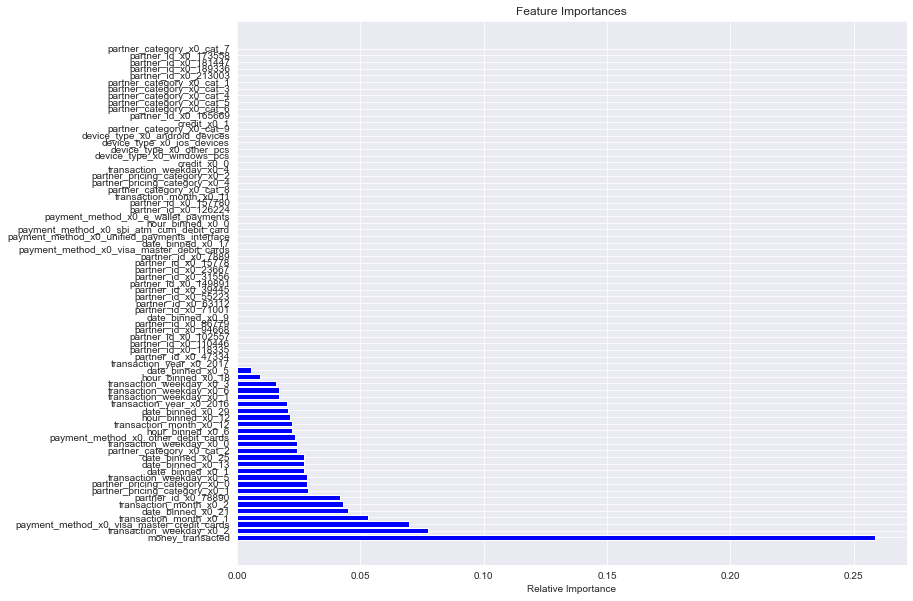

In [106]:
plt.figure(figsize = (12,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.savefig('imp_feat.png')

In [107]:
imp_indices = []
for x in indices:
    if importances[x] > 0:
        imp_indices.append(x)
        
print(imp_indices)
print(len(imp_indices))

[0, 55, 5, 49, 67, 50, 16, 44, 43, 58, 62, 65, 68, 31, 53, 2, 71, 52, 72, 69, 47, 54, 59, 56, 73, 63]
26


In [108]:
imp_cols = list(X_train_final.columns[imp_indices])
print(imp_cols)

['money_transacted', 'transaction_weekday_x0_2', 'payment_method_x0_visa_master_credit_cards', 'transaction_month_x0_1', 'date_binned_x0_21', 'transaction_month_x0_2', 'partner_id_x0_78890', 'partner_pricing_category_x0_1', 'partner_pricing_category_x0_0', 'transaction_weekday_x0_5', 'date_binned_x0_1', 'date_binned_x0_13', 'date_binned_x0_25', 'partner_category_x0_cat_2', 'transaction_weekday_x0_0', 'payment_method_x0_other_debit_cards', 'hour_binned_x0_6', 'transaction_month_x0_12', 'hour_binned_x0_12', 'date_binned_x0_29', 'transaction_year_x0_2016', 'transaction_weekday_x0_1', 'transaction_weekday_x0_6', 'transaction_weekday_x0_3', 'hour_binned_x0_18', 'date_binned_x0_5']


In [109]:
XGB_model.fit(X_train_final[imp_cols],y_train)

y_pred_train = XGB_model.predict(X_train_final[imp_cols])
y_pred_val = XGB_model.predict(X_val_final[imp_cols])

In [110]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"XGB Classifier Imp features",scores)
scores


            CLASSIFICATION REPORT AND CONFUSION MATRIX FOR TRAIN DATA
            
Predicted      0    1
Actual               
0          61096    4
1              7  116
              precision    recall  f1-score   support

           0     0.9999    0.9999    0.9999     61100
           1     0.9667    0.9431    0.9547       123

    accuracy                         0.9998     61223
   macro avg     0.9833    0.9715    0.9773     61223
weighted avg     0.9998    0.9998    0.9998     61223


            CLASSIFICATION REPORT AND CONFUSION MATRIX FOR Val DATA
            
Predicted      0   1
Actual              
0          15272   3
1              3  28
              precision    recall  f1-score   support

           0     0.9998    0.9998    0.9998     15275
           1     0.9032    0.9032    0.9032        31

    accuracy                         0.9996     15306
   macro avg     0.9515    0.9515    0.9515     15306
weighted avg     0.9996    0.9996    0.9996     15306



,Model,Train_F1_Score,Val_F1_Score,Train_Recall,Val_Recall,Train_Precision,Val_Precision,Train_Accuracy,Val_Accuracy
0,LogisticRegression,0.471204,0.311111,0.365854,0.225806,0.661765,0.500000,0.998350,0.997975
1,LogisticRegression Balanced,0.522293,0.462687,1.000000,1.000000,0.353448,0.300971,0.996325,0.995296
2,DecisionTree Normal,0.983607,0.896552,0.975610,0.838710,0.991736,0.962963,0.999935,0.999608
3,DecisionTree Balanced,0.984000,0.885246,1.000000,0.870968,0.968504,0.900000,0.999935,0.999543
4,DecisionTree Imp Params,0.984000,0.885246,1.000000,0.870968,0.968504,0.900000,0.999935,0.999543
5,Random Forest Classifier,0.309252,0.319588,0.991870,1.000000,0.183183,0.190184,0.991098,0.991376
6,XGB Classifier,0.954733,0.903226,0.943089,0.903226,0.966667,0.903226,0.999820,0.999608
7,XGB Classifier Imp features,0.954733,0.903226,0.943089,0.903226,0.966667,0.903226,0.999820,0.999608


## XGBoost Classifier gave the best results among all the above models with relatively less overfitting

### From the above we can see that Money_transacted, payment methods and partner columns are more important features to detect a fraudulent transaction.

#### Measures to be taken to reduce the fraudulent transactions in future:
* Specifing a transaction limit like 2000 or 3000, because most of the transactions above that value are fraudulent can help.
* Most of the fraud payments are done through cards, using two or three step verifications for card payments can help reduce the fraud transactons.
* Flagging the partner whos is making fraudulent transactions or blocking their membership can help.